In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['final_bought_sessions.csv']


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/final_bought_sessions.csv')

In [4]:
df.head()

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
0,11,214717089,784,65.33,385,12,0.157778,1,385,3,3,1,2,0,0,0.27,0
1,11,214743335,784,65.33,385,12,0.157778,1,43,3,3,1,2,0,0,0.07,0
2,11,214563337,784,65.33,385,12,0.157778,1,27,3,3,1,2,0,0,0.02,0
3,11,214819762,784,65.33,385,12,0.157778,1,20,3,3,1,2,0,1,0.13,0
4,11,214826837,784,65.33,385,12,0.157778,1,49,3,3,1,2,0,0,0.26,0


In [5]:
grouped = df.groupby(['session'])
first_click = grouped.apply(lambda g: g[g['f_click'] == 1])

In [6]:
buy_first_click=first_click[first_click['purchased']==1]
notbuy_first_click = first_click[first_click['purchased']==0]

In [7]:
print(len(buy_first_click))
print(len(notbuy_first_click))

367288
142408


**When items are first clicked in a session**

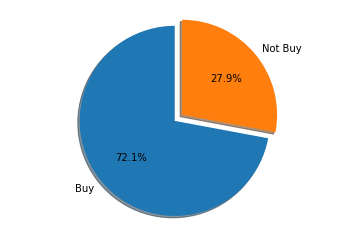

In [8]:
labels = 'Buy','Not Buy'
sizes = [72.06, 27.93]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**When items are last clicked in a session**

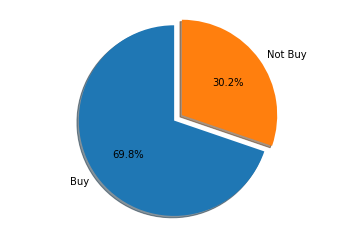

In [9]:
labels = 'Buy','Not Buy'
sizes = [69.75, 30.24]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [10]:
grouped = df.groupby(['session'])
last_click = grouped.apply(lambda g: g[g['l_click'] == 1])

In [11]:
buy_last_click=last_click[last_click['purchased']==1]
notbuy_last_click = last_click[last_click['purchased']==0]

In [12]:
print(len(buy_last_click))
print(len(notbuy_last_click))

355516
154180


In [13]:
max_click=df.groupby(['session'])['item_clicks'].max().reset_index(name='item_clicks')
min_click=df.groupby(['session'])['item_clicks'].min().reset_index(name='item_clicks')
max_dwell=df.groupby(['session'])['duration_f_l'].max().reset_index(name='duration_f_l')
min_dwell=df.groupby(['session'])['duration_f_l'].min().reset_index(name='duration_f_l')

In [14]:
max_click_pur=df.groupby(['session','purchased'])['item_clicks'].max().reset_index(name='item_clicks')
min_click_pur=df.groupby(['session','purchased'])['item_clicks'].min().reset_index(name='item_clicks')
max_dwell_pur=df.groupby(['session','purchased'])['duration_f_l'].max().reset_index(name='duration_f_l')
min_dwell_pur=df.groupby(['session','purchased'])['duration_f_l'].min().reset_index(name='duration_f_l')

In [15]:
max_click=pd.merge(max_click,max_click_pur,on=['session','item_clicks'])
min_click=pd.merge(min_click,min_click_pur,on=['session','item_clicks'])
max_dwell=pd.merge(max_dwell,max_dwell_pur,on=['session','duration_f_l'])
min_dwell=pd.merge(min_dwell,min_dwell_pur,on=['session','duration_f_l'])

In [16]:
buy_max_click=max_click[max_click['purchased']==1]
notbuy_max_click=max_click[max_click['purchased']==0]
buy_min_click = min_click[min_click['purchased']==1]
notbuy_min_click = min_click[min_click['purchased']==0]
buy_max_dwell = max_dwell[max_dwell['purchased']==1]
notbuy_max_dwell = max_dwell[min_dwell['purchased']==0]
buy_min_dwell = min_dwell[min_dwell['purchased']==1]
notbuy_min_dwell = min_dwell[min_dwell['purchased']==0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


**Items Bought when clicked maximum time in session**

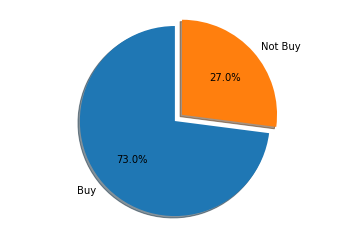

In [17]:
labels = 'Buy','Not Buy'
sizes = [72.96, 27.04]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Items Bought when clicked minimum number of times in a session****

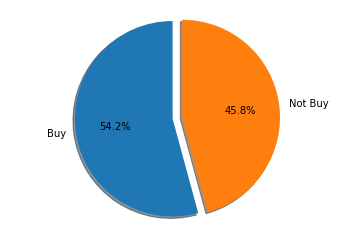

In [18]:
labels = 'Buy','Not Buy'
sizes = [54.21, 45.78]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**When Maximum time spent on an item in a session**

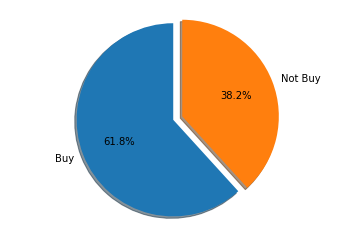

In [19]:
labels = 'Buy','Not Buy'
sizes = [61.75, 38.24]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**When Minimum time spent on an item in a session**

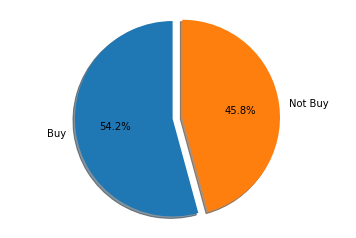

In [20]:
labels = 'Buy','Not Buy'
sizes = [54.23, 45.76]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
print(len(buy_max_click))
print(len(notbuy_max_click))
print(len(buy_min_click))
print(len(notbuy_min_click))
print(len(buy_max_dwell))
print(len(notbuy_max_dwell))
print(len(buy_min_dwell))
print(len(notbuy_min_dwell))

473630
175446
392586
331527
458288
283803
389885
328950
